In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.array([
    [0.1, 0.3, 0.7, 1.2, 1.6, 2.2, 2.7, 3.1, 3.5, 3.9],
    [0.558, 0.569, 0.176, -0.207, -0.133, 0.132, 0.055, -0.090, -0.069, 0.027]
]).T

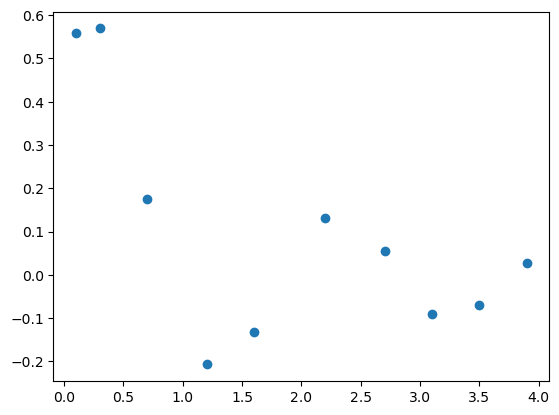

In [3]:
plt.plot(*data.T,'o')

In [4]:
ti = data[:,0]
yi = data[:,1]

In [5]:
def y(t,x):
    A, tau, omega, phi = x
    return A*np.exp(-tau*t)*np.sin(omega*t+phi)

def F(x):
    return y(ti,x)-yi

def dF(x):
    A, tau, omega, phi = x
    return np.array([np.exp(-tau*ti)*np.sin(omega*ti+phi),
                     -ti*A*np.exp(-tau*ti)*np.sin(omega*ti+phi),
                     ti*A*np.exp(-tau*ti)*np.cos(omega*ti+phi),
                     A*np.exp(-tau*ti)*np.cos(omega*ti+phi)]).T


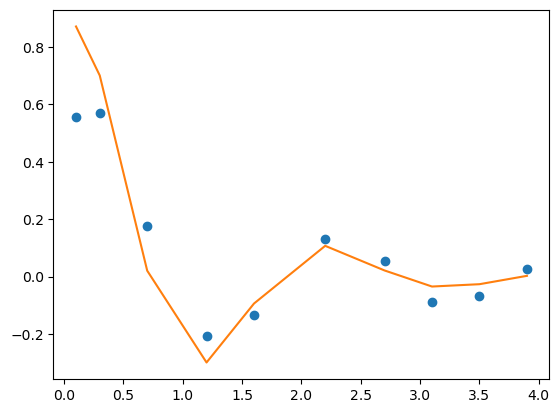

In [6]:
x0 = np.array([1,1,3,1],dtype=float)
plt.plot(*data.T,'o')
plt.plot(ti,y(ti,x0))

In [7]:
from scipy.linalg import solve_triangular

In [8]:
maxIter = 100
tol = 1e-10
x = x0.copy()
for k in range(maxIter):
    A = dF(x)
    b = F(x)
    q,r = np.linalg.qr(A)
    s = solve_triangular(r,q.T@b)
    x -= s
    err = np.linalg.norm(dF(x).T@F(x))
    print(k, err)
    if err < tol:
        break


0 0.07066924178449736
1 0.007667311379775488
2 0.0013838504393926465
3 0.0004318926433968196
4 0.00015315297340658948
5 5.2715317992597544e-05
6 1.844606502608995e-05
7 6.408222596782445e-06
8 2.234404094622426e-06
9 7.776815846170157e-07
10 2.7092423240716857e-07
11 9.433741878142874e-08
12 3.285720850486357e-08
13 1.1442449591181712e-08
14 3.985091969416112e-09
15 1.3878456435574686e-09
16 4.833400246551684e-10
17 1.6832930408951215e-10
18 5.862306115093892e-11
